# contributors
### Omar Morshdy 211001749
### Omar Shehata 222000109
### Ahmed Kamal 211000202

- Import all need libraries

In [23]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage
# from scipy.fftpack import fft, fft2, fftshift, ifftshift, ifft2
import os

- check classes

In [5]:
train_path = 'data/train/'

num_classes = 0
class_lables = []
for filename in os.listdir(train_path):
    num_classes += 1
    class_lables.append(filename)

print("Number of classes: ", num_classes)
print(class_lables)


Number of classes:  7
['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


- Data Visualization

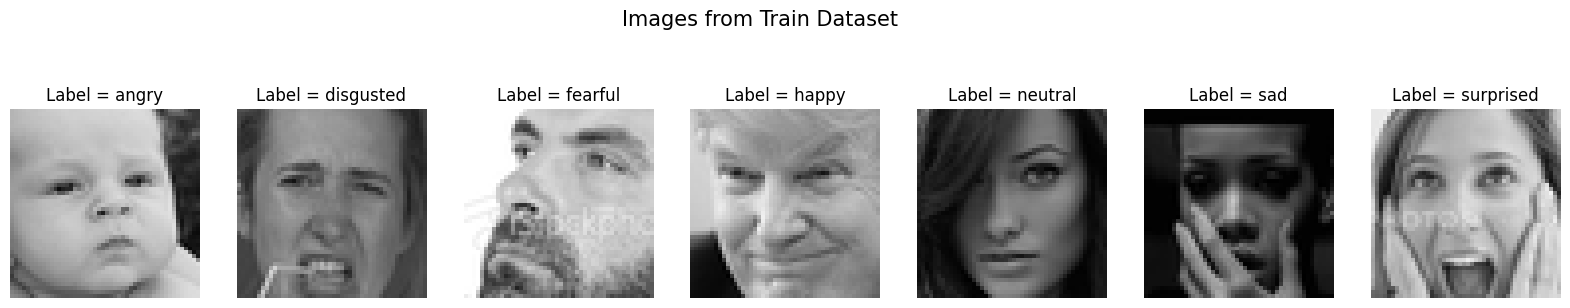

In [25]:
fig, axes = plt.subplots(1, 7, figsize=(20, 4))
fig.suptitle('Images from Train Dataset', fontsize=15)

axes = axes.flatten()

for i, label in enumerate(os.listdir(train_path)):
    if i == len(axes):
        break
    
    label_path = os.path.join(train_path, label)
    
    if os.path.isdir(label_path):
        img_file = [f for f in os.listdir(label_path) if f.lower().endswith(('.png'))]
        
        if img_file:
            random_img = random.choice(img_file)
            
            img_path = os.path.join(label_path, random_img)
            
            img = cv2.imread(img_path)
            
            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(f"Label = {label}")
            axes[i].axis('off')

plt.show()

- Load Images

In [6]:
train_image = []
train_lables = []

for label in class_lables:
    label_path = os.path.join(train_path, label)
    for img_path in os.listdir(label_path):
        img = cv2.imread(os.path.join(label_path, img_path))
        img_gray = rgb2gray(img)
        train_image.append(img_gray)
        train_lables.append(label)


- Normalize images between 0 and 1

In [7]:
train_image = np.array(train_image).astype('float32')
train_image = train_image/255 

# Feature Extraction